# 6. 지도학습 : 회귀

## 6.1. 상관분석

+ "행복지수와 관련된 요인은 무엇일까?"

In [1]:
## (1) 데이터 확인 및 전처리

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# 데이터 불러오기
df2021 = pd.read_csv('./data/2021.csv', index_col='Rank')
df2021.head(3)

,Country name,Happiness score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Dystopia
Rank,,,,,,,,,,
1,Finland,7.842,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,3.253
2,Denmark,7.620,7.687,7.552,10.933,0.954,72.7,0.946,0.030,2.868
3,Switzerland,7.571,7.643,7.500,11.117,0.942,74.4,0.919,0.025,2.839


In [15]:
df2021.dtypes

Country name                     object
Happiness score                 float64
upperwhisker                    float64
lowerwhisker                    float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Dystopia                        float64
dtype: object

In [16]:
# 데이터 전처리 : 열 삭제
df2021.drop(columns=['upperwhisker', 'lowerwhisker', 'Dystopia'], inplace=True)

In [17]:
# 데이터 전처리 : 열 이름 변경
df2021.columns = ['Country', 'Score', 'GDP_per_capita', 'Social_support',
                  'Life_expectancy', 'Freedom', 'Generosity']
df2021.columns

Index(['Country', 'Score', 'GDP_per_capita', 'Social_support',
       'Life_expectancy', 'Freedom', 'Generosity'],
      dtype='object')

In [19]:
## (2) 데이터 분석 및 시각화
## (2-1) 행복 점수와 기능의 상관관계
##       한 국가의 행복지수와 경제적(GDP), 법적 상태(Freedom)는 상관관계가 있는가?
df1 = df2021.copy()
df1 = df1[['Country', 'Score', 'GDP_per_capita', 'Freedom']]
df1.head(3)

,Country,Score,GDP_per_capita,Freedom
Rank,,,,
1,Finland,7.842,10.775,0.949
2,Denmark,7.620,10.933,0.946
3,Switzerland,7.571,11.117,0.919


<Figure size 300x200 with 0 Axes>

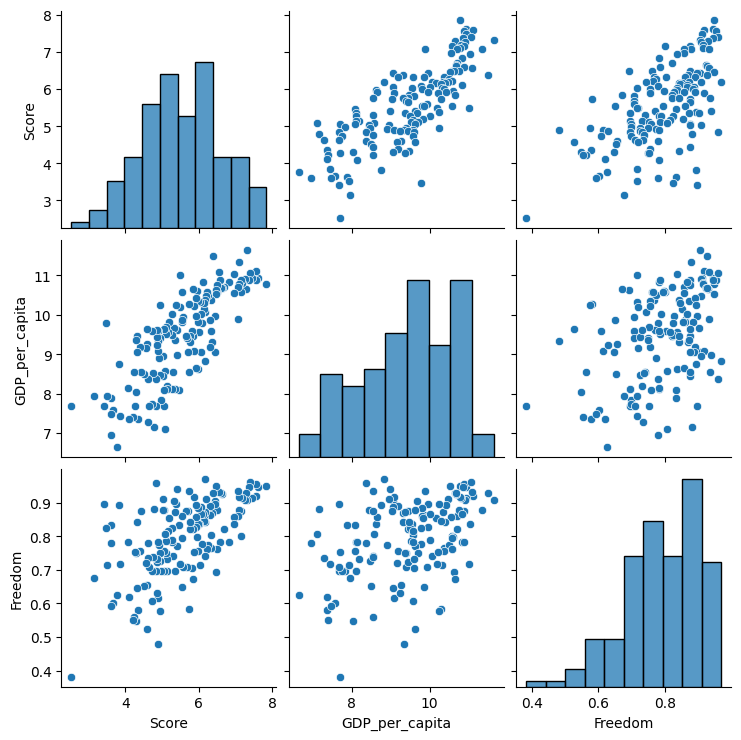

In [28]:
# 산점도
plt.figure(figsize=(3,2))
sns.pairplot(df1)
plt.show()

In [35]:
## 상관계수(correlation coefficient)
# 행복지수와 GDP 간 상관계수는 0.79로 나타남 -> 강한 양의 상관관계
# 행복지수와 Freedom 간 상관계수는 0.61로 나타남 -> 뚜렷한 양의 상관관계
#corr = df1.select_dtypes(include='number').corr()
corr = df1[['Score', 'GDP_per_capita', 'Freedom']].corr()
corr

,Score,GDP_per_capita,Freedom
Score,1.000000,0.789760,0.607753
GDP_per_capita,0.789760,1.000000,0.432323
Freedom,0.607753,0.432323,1.000000


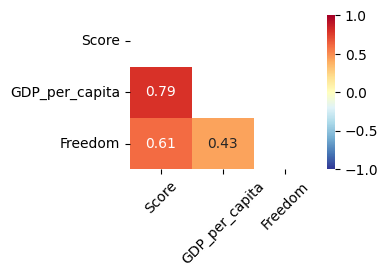

In [48]:
# 히트맵
upp_mat = np.triu(corr)

plt.figure(figsize=(3, 2))
sns.heatmap(corr, annot=True, mask=upp_mat,
            cmap='RdYlBu_r', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()